In [49]:
# 라이브러리 및 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname='C:\WINDOWS\FONTS\MALGUNSL.TTF')

# 데이터 준비
data = pd.read_csv('bodyfat.csv', encoding='euc-kr')
data['Weight'] = data['Weight'] * 0.45
data['Height'] = data['Height'] * 2.54

x_data = data[['Density','Age','Weight','Height','Neck','Chest','Abdomen','Hip','Thigh','Knee','Ankle','Forearm','Wrist']].to_numpy()
y_data = data[['BodyFat']].to_numpy()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [82]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,80.515982,178.177976,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,13.225122,9.303654,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,53.325000,74.930000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,71.550000,173.355000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,79.425000,177.800000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,88.650000,183.515000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,163.417500,197.485000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'BodyFat')

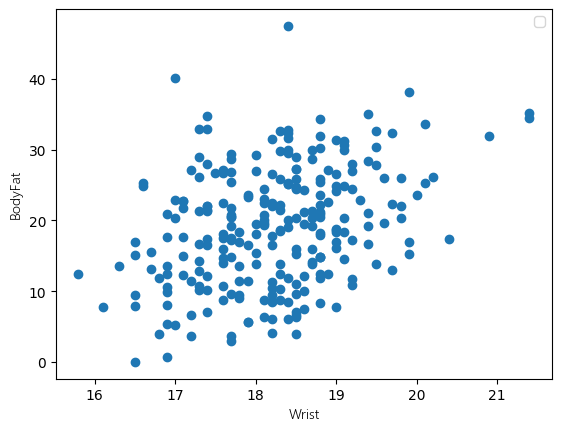

In [92]:
# plt.scatter(train_input[:, 0], train_target)
plt.scatter(data['Wrist'], data['BodyFat'])
plt.legend(loc='best', prop=fontprop)
plt.xlabel('Wrist', fontproperties=fontprop)
plt.ylabel('BodyFat', fontproperties=fontprop)

In [83]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(x_data, y_data, random_state=42)

In [84]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

In [85]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(train_input, train_target) 

LinearRegression()

In [86]:
y_pred = mlr.predict(test_input)
r2 = r2_score(test_target, y_pred)
print('선형회귀 r2 : ', r2)

rmse=np.sqrt(mean_squared_error(test_target, y_pred))
print('선형회귀 RMSE : ', rmse)

선형회귀 r2 :  0.992353169655778
선형회귀 RMSE :  0.6472300198527767


In [87]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [88]:
y_pred = rf.predict(test_input)
r2 = r2_score(test_target, y_pred)
print('랜덤포레스트 r2 : ', r2)

rmse=np.sqrt(mean_squared_error(test_target, y_pred))
print('랜덤포레스트 RMSE : ', rmse)

랜덤포레스트 r2 :  0.9980793992597299
랜덤포레스트 RMSE :  0.3243668558019712


In [89]:
# 예측
test_predict = np.array([[1.0414,22,69,167,34.0,95.8,87.9,99.2,59.6,38.9,24.0,25.2,16.6]])
test_predict = ss.transform(test_predict)
print(rf.predict(test_predict))

[25.282]


Text(0, 0.5, '체지방률')

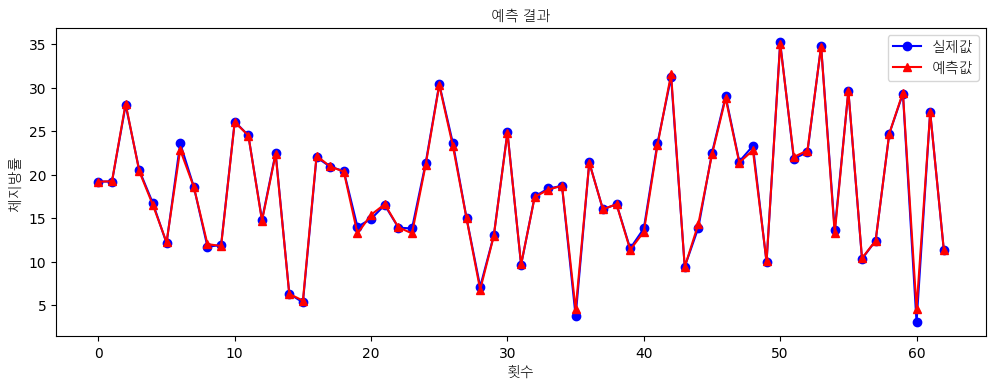

In [90]:
fig = plt.figure(figsize=(12, 4))
graph = fig.add_subplot(1, 1, 1)
graph.plot(test_target, marker='o', color='b', label='실제값')
graph.plot(y_pred, marker='^', color='r', label='예측값')
plt.title('예측 결과', size=30, fontproperties=fontprop)
plt.legend(loc='best', prop=fontprop)
plt.xlabel('횟수', fontproperties=fontprop)
plt.ylabel('체지방률', fontproperties=fontprop)